In [1]:
import pandas as pd
import numpy as np

In [2]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


#### 使用 get_dummies 只会编码字符串特征，不会改变整数特征

使用 one-hot 编码与统计学中使用的虚拟编码（dummy encoding）非常相似，但并不完全相同。为简单起见，将每个类别编码为不同的二元特征。在统计学中，通常将具有 k 个可能取值的分类特征编码为 k - 1 个特征（都等于零表示最后一个可能取值）。这么做是为了简化分析（更专业的说法是，这可以避免使数据矩阵秩亏）。

In [3]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [4]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


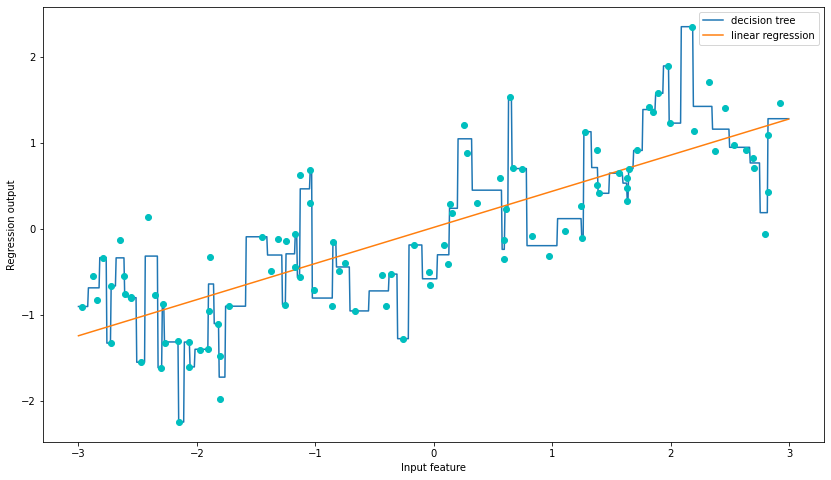

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
from matplotlib import pyplot as plt


X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.figure(figsize=(14, 8))
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c="c")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

## 使用分箱是扩展连续特征的一种方法。另一种方法是使用原始特征的 多项式 （polynomial)

### 分箱

In [6]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [7]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [8]:
from sklearn.preprocessing import OneHotEncoder
# 使用OneHotEncoder进行变换
encoder = OneHotEncoder(sparse=False)
# encoder.fit找到which_bin中的唯一值
encoder.fit(which_bin)
# transform创建one-hot编码
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


## Tolist

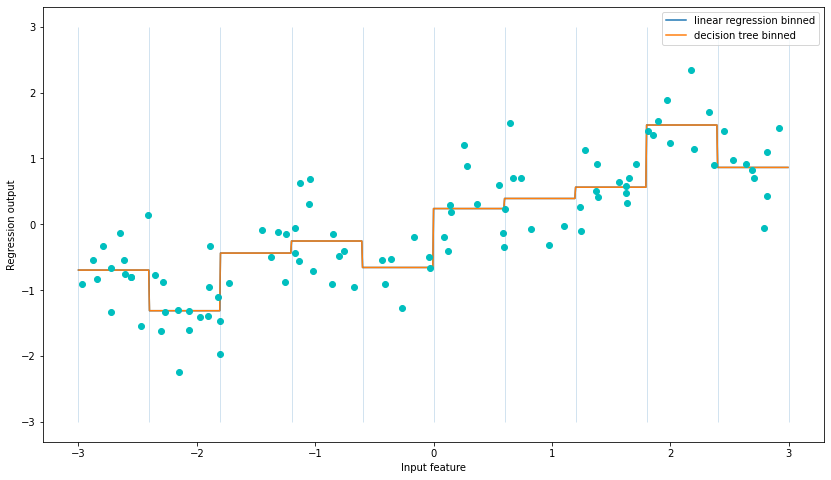

In [10]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)

plt.figure(figsize=(14, 8))
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c="c")
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.show()

In [11]:
X.shape

(100, 1)

## 多项式 （polynomial)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# 包含直到x ** 10的多项式:
# 默认的"include_bias=True"添加恒等于1的常数特征
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [13]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [14]:
print("Entries of X:\n{}".format(X[:1]))
print("Entries of X_poly:\n{}".format(X_poly[:1]))

Entries of X:
[[-0.75275929]]
Entries of X_poly:
[[-0.75275929  0.56664654 -0.42654845  0.32108831 -0.2417022   0.18194358
  -0.13695972  0.1030977  -0.07760775  0.05841996]]


In [15]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


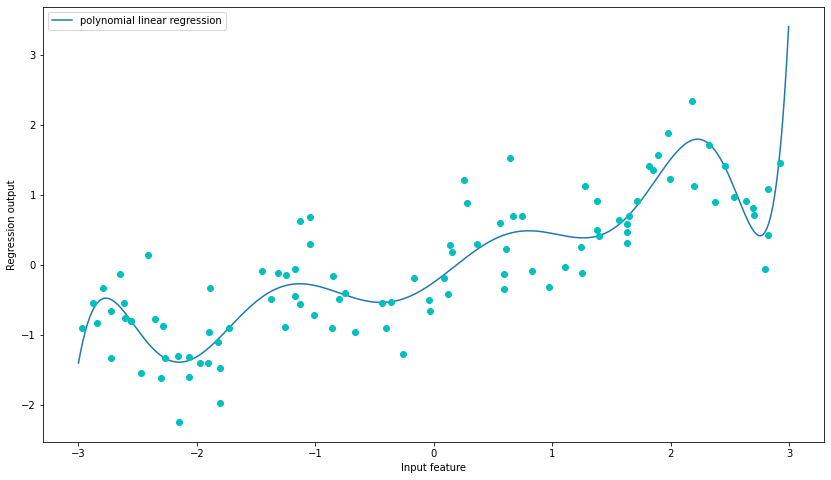

In [16]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.figure(figsize=(14, 8))
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c="c")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

In [17]:
from sklearn.svm import SVR

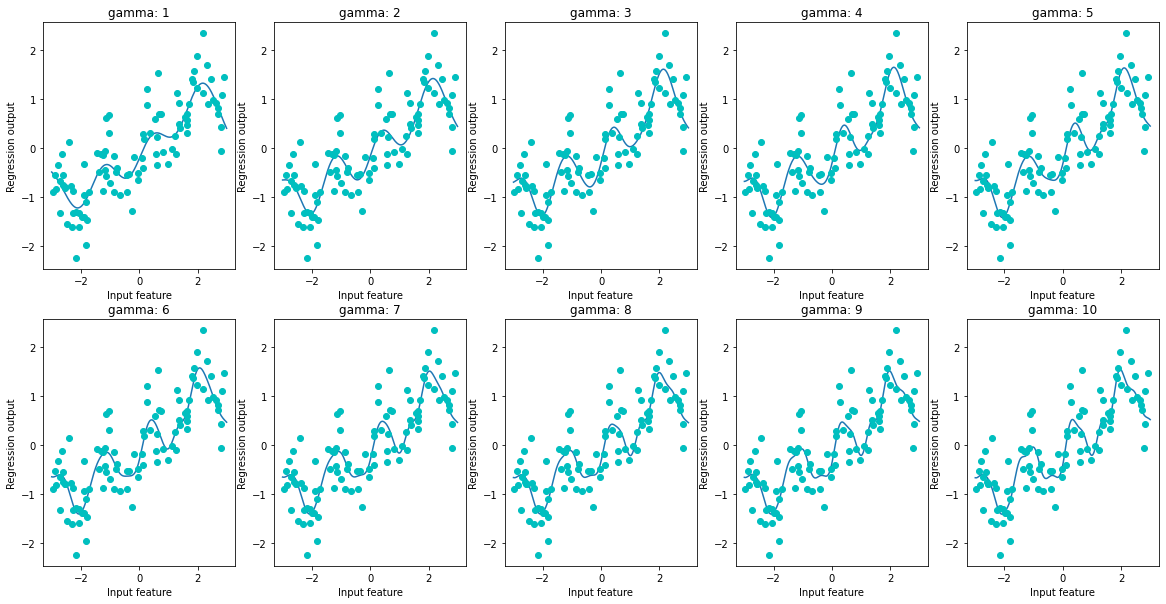

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for gamma, ax in zip(range(1, 11), axes.ravel()):
    svr = SVR(gamma=gamma).fit(X, y)
    ax.plot(line, svr.predict(line))
    ax.plot(X[:, 0], y, 'o', c="c")
    ax.set_title("gamma: {}".format(gamma))
    ax.set_ylabel("Regression output")
    ax.set_xlabel("Input feature")

plt.show()